<a href="https://colab.research.google.com/github/crinex/Predict-Dementia/blob/main/Dementia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Study Dementia
-  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/dementia_data.csv')

In [3]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


- Subject ID : 환자의 고유 번호
- MRI ID : MRI를 통해 생긴 환자 고유 번호
- Group : 치매환자(Demented)와, 비치매환자(Nondemented) 분류, 예측하기 위한 목표 변수
- Visit : 치매상태를 확인하기 위해 방문한 횟수
- MR Delay : 뭔지 모르겠다.
- M/F : 남(M), 여(F)
- Hand : 사용손
- Age : 나이
- EDUC : 교육을 받은 연수를 의미하는것 같다.
- SES : 홀링스헤드 지수에 의해 평가되는 사회경제적 지위를 나타낸다고 한다.(1~5)
- MMSE : Mini-Mental State Examination 점수라고 한다.(0점부터 30점까지 있다.)
- CDR : Clinical Dementia Rating(임상치매등급)

    - 0    : No-Dementia
    - 0.5  : Very mild AD(아주 약한 알츠하이머 증상)
    - 1    : Mild AD (약한 알츠하이머 증상)
    - 2    : Moderate AD (보통의 알츠하이머 증상)
    - 3    : Severe Dementia (중증 치매)

- eTIV : Estimated total intracranial volume, mm3, 뭐..추정된 두개골의 크기?
- nWBV : Normalized Whole-brain volume, 
- ASF : Atlas scaling factor

In [5]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


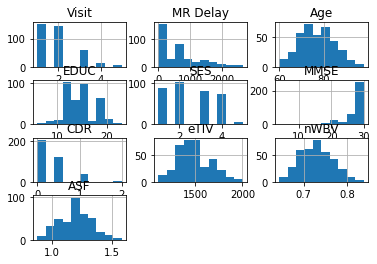

<Figure size 18000x18000 with 0 Axes>

In [14]:
df.hist()
plt.figure(figsize=(250, 250))
plt.tight_layout()
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [17]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [19]:
df = df.drop(['Subject ID', 'MRI ID', 'Hand'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     373 non-null    object 
 1   Visit     373 non-null    int64  
 2   MR Delay  373 non-null    int64  
 3   M/F       373 non-null    object 
 4   Age       373 non-null    int64  
 5   EDUC      373 non-null    int64  
 6   SES       354 non-null    float64
 7   MMSE      371 non-null    float64
 8   CDR       373 non-null    float64
 9   eTIV      373 non-null    int64  
 10  nWBV      373 non-null    float64
 11  ASF       373 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 35.1+ KB


In [20]:
df.isnull().sum()

Group        0
Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

In [22]:
df[['SES', 'MMSE']]

,SES,MMSE
0,2.0,27.0
1,2.0,30.0
2,NaN,23.0
3,NaN,28.0
4,NaN,22.0
...,...,...
368,1.0,28.0
369,1.0,26.0
370,2.0,30.0
371,2.0,30.0


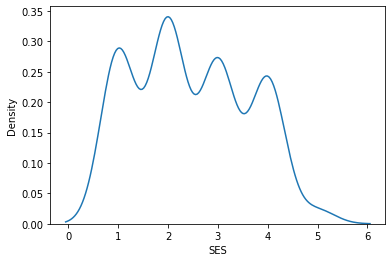

count    354.000000
mean       2.460452
std        1.134005
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64


In [25]:
sns.kdeplot(df.SES)
plt.show()
print(df.SES.describe())

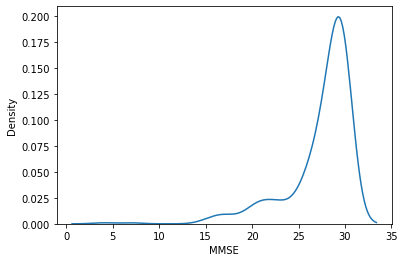

count    371.000000
mean      27.342318
std        3.683244
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64


In [26]:
sns.kdeplot(df.MMSE)
plt.show()
print(df.MMSE.describe())

In [27]:
df.SES.fillna(df.SES.median(), inplace=True)
df.MMSE.fillna(df.MMSE.median(), inplace=True)

In [28]:
df.isnull().sum()

Group       0
Visit       0
MR Delay    0
M/F         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


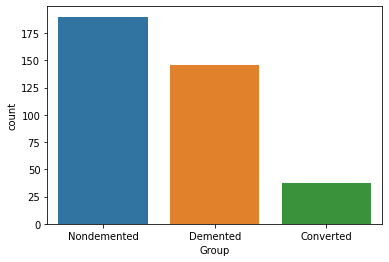

In [29]:
sns.countplot(df.Group)
plt.show()

In [35]:
df['CDR'].unique()

array([0. , 0.5, 1. , 2. ])

In [36]:
# cdr을 직관적으로 범주화
def cat_cdr(n):
  if n == 0:
    return 'Normal'
  else :
    return 'Dementia'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


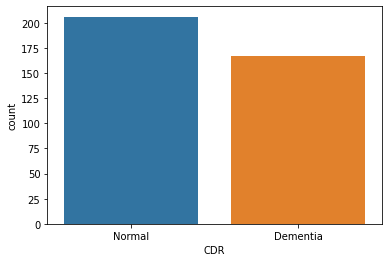

In [37]:
df.CDR = df.CDR.apply(lambda x : cat_cdr(x))
sns.countplot(df.CDR)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


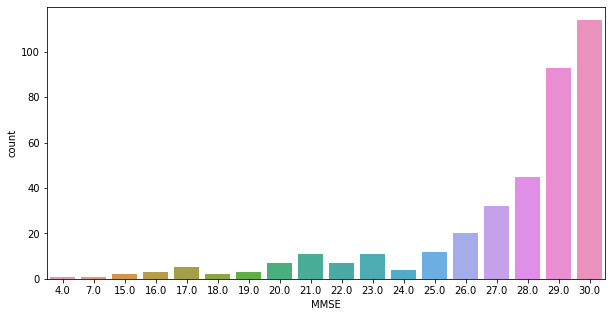

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(df.MMSE)
plt.show()

In [45]:
def cat_mmse(n):
  if n >= 24:
    return 'Normal'
  elif n <= 9:
    return 'Severe'
  elif n >= 10 and n <= 18:
    return 'Moderate'
  elif n >= 19 and n <= 23:
    return 'Mild'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


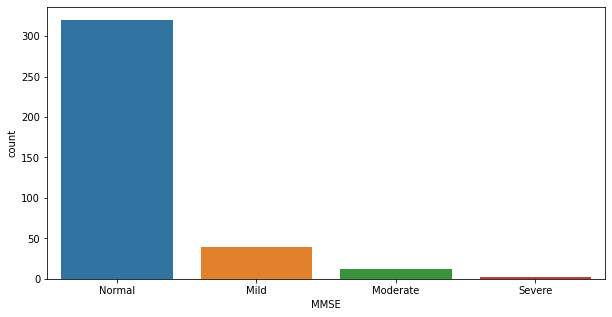

In [46]:
df.MMSE = df.MMSE.apply(lambda x: cat_mmse(x))
plt.figure(figsize=(10,5))
sns.countplot(df.MMSE)
plt.show()

In [47]:
df

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,Normal,Normal,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,Normal,Normal,2004,0.681,0.876
2,Demented,1,0,M,75,12,2.0,Mild,Dementia,1678,0.736,1.046
3,Demented,2,560,M,76,12,2.0,Normal,Dementia,1738,0.713,1.010
4,Demented,3,1895,M,80,12,2.0,Mild,Dementia,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,82,16,1.0,Normal,Dementia,1693,0.694,1.037
369,Demented,3,2297,M,86,16,1.0,Normal,Dementia,1688,0.675,1.040
370,Nondemented,1,0,F,61,13,2.0,Normal,Normal,1319,0.801,1.331
371,Nondemented,2,763,F,63,13,2.0,Normal,Normal,1327,0.796,1.323


In [48]:
df2 = pd.read_csv('/content/dementia_data.csv')

In [50]:
df2.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [51]:
df2.drop(['Subject ID', 'MRI ID', 'Hand', 'MR Delay'],axis=1, inplace=True)
df2.head()

,Group,Visit,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [52]:
df2.SES.fillna(df2.SES.median(), inplace=True)
df2.MMSE.fillna(df2.MMSE.median(), inplace=True)

In [53]:
df2.isnull().sum()

Group    0
Visit    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [54]:
group_mapping = {
    'Nondemented' : 0,
    'Demented' : 1,
    'Converted' : 1
}


In [55]:
df2.Group = df2.Group.map(group_mapping)

In [56]:
df2.head()

,Group,Visit,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,M,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,2,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,3,M,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [57]:
df2.drop(['M/F'], axis=1, inplace=True)

In [58]:
df2.head(
)

,Group,Visit,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,2,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,3,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [59]:
x = df2.drop(['Group'], axis = 1)
y = df2.Group

In [61]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [70]:
x_scaled = preprocessing.scale(x)

In [71]:
x_scaled

array([[-0.95706686,  1.30873772, -0.20813199, ...,  2.83605891,
        -0.90516867, -2.2657425 ],
       [ 0.12799678,  1.43978716, -0.20813199, ...,  2.93270307,
        -1.30964265, -2.31650145],
       [-0.95706686, -0.26385558, -0.90439416, ...,  1.07940909,
         0.17342861, -1.08378418],
       ...,
       [-0.95706686, -2.09854775, -0.55626308, ..., -0.96148827,
         1.92614919,  0.98283006],
       [ 0.12799678, -1.83644887, -0.55626308, ..., -0.91600866,
         1.79132453,  0.92481984],
       [ 1.21306043, -1.57434999, -0.55626308, ..., -0.88189896,
         1.92614919,  0.88131217]])

In [72]:
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [73]:
x_scaled

,Visit,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,-0.957067,1.308738,-0.208132,-0.394466,-0.095686,-0.777653,2.836059,-0.905169,-2.265742
1,0.127997,1.439787,-0.208132,-0.394466,0.721664,-0.777653,2.932703,-1.309643,-2.316501
2,-0.957067,-0.263856,-0.904394,-0.394466,-1.185486,0.559050,1.079409,0.173429,-1.083784
3,0.127997,-0.132806,-0.904394,-0.394466,0.176764,0.559050,1.420506,-0.446765,-1.344830
4,1.213060,0.391392,-0.904394,-0.394466,-1.457936,0.559050,1.193108,-0.770344,-1.170800
...,...,...,...,...,...,...,...,...,...
368,0.127997,0.653491,0.488130,-1.297140,0.176764,0.559050,1.164683,-0.959099,-1.149046
369,1.213060,1.177688,0.488130,-1.297140,-0.368136,0.559050,1.136259,-1.471432,-1.127292
370,-0.957067,-2.098548,-0.556263,-0.394466,0.721664,-0.777653,-0.961488,1.926149,0.982830
371,0.127997,-1.836449,-0.556263,-0.394466,0.721664,-0.777653,-0.916009,1.791325,0.924820


In [74]:
x = x_scaled

In [75]:
x

,Visit,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,-0.957067,1.308738,-0.208132,-0.394466,-0.095686,-0.777653,2.836059,-0.905169,-2.265742
1,0.127997,1.439787,-0.208132,-0.394466,0.721664,-0.777653,2.932703,-1.309643,-2.316501
2,-0.957067,-0.263856,-0.904394,-0.394466,-1.185486,0.559050,1.079409,0.173429,-1.083784
3,0.127997,-0.132806,-0.904394,-0.394466,0.176764,0.559050,1.420506,-0.446765,-1.344830
4,1.213060,0.391392,-0.904394,-0.394466,-1.457936,0.559050,1.193108,-0.770344,-1.170800
...,...,...,...,...,...,...,...,...,...
368,0.127997,0.653491,0.488130,-1.297140,0.176764,0.559050,1.164683,-0.959099,-1.149046
369,1.213060,1.177688,0.488130,-1.297140,-0.368136,0.559050,1.136259,-1.471432,-1.127292
370,-0.957067,-2.098548,-0.556263,-0.394466,0.721664,-0.777653,-0.961488,1.926149,0.982830
371,0.127997,-1.836449,-0.556263,-0.394466,0.721664,-0.777653,-0.916009,1.791325,0.924820


In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [87]:
print(x_train.shape)
print(y_train.shape)

(298, 9)
(298,)


In [88]:
y_train.head()

16     1
193    0
45     1
305    0
116    0
Name: Group, dtype: int64

In [77]:
from keras import Sequential
from keras.layers import Dense

In [91]:
model2 = Sequential()

In [92]:
model2.add(Dense(32, input_dim=9, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [93]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [94]:
model2.fit(x_train, y_train, epochs=500, verbose=1)

Epoch 1/500
10/10 [==============================] - 1s 2ms/step - loss: 0.6667 - accuracy: 0.6236
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.6554
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 0.5811 - accuracy: 0.7171
Epoch 4/500
10/10 [==============================] - 0s 1ms/step - loss: 0.5611 - accuracy: 0.7758
Epoch 5/500
10/10 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 0.7717
Epoch 6/500
10/10 [==============================] - 0s 1ms/step - loss: 0.5033 - accuracy: 0.8397
Epoch 7/500
10/10 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.8668
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.8410
Epoch 9/500
10/10 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.8567
Epoch 10/500
10/10 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8748
Epoch 11/

In [96]:
scores = model2.evaluate(x_train, y_train)
print(scores)

10/10 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9799
[0.04192926362156868, 0.9798657894134521]


In [97]:
print('Training Accuracy : %.2f%%\n' % (scores[1]*100))

Training Accuracy : 97.99%



In [98]:
scores = model2.evaluate(x_test, y_test)
print('Testing Accuracy : %.2f%%\n' % (scores[1]*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.8933
Testing Accuracy : 89.33%



In [99]:
from sklearn.metrics import roc_curve

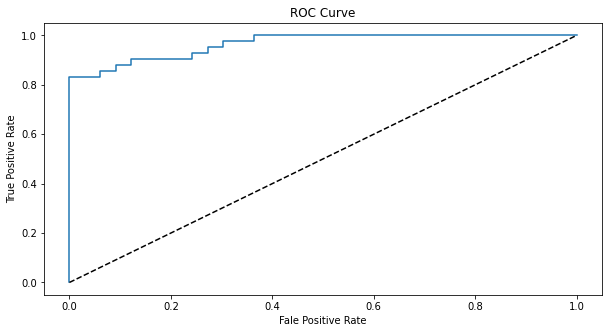

In [100]:
y_pred = model2.predict(x_test)
FPR, TPR, _ = roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 5))
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('Fale Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()